In [18]:
import pandas

In [19]:
df_confirmed = pandas.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv', infer_datetime_format=True, parse_dates=True)

In [20]:
#print(df_confirmed)
df_confirmed_nocoords = df_confirmed.drop(columns=['Lat', 'Long'])
#print(df_confirmed_nocoords)
#print(df_confirmed_nocoords.columns)
#print(df_confirmed_nocoords[["Country/Region", "Province/State"]])
country_columns = pandas.MultiIndex.from_frame(df_confirmed_nocoords[["Country/Region", "Province/State"]])
#print(country_columns)
df_confirmed_nocoords_nocountry = df_confirmed_nocoords.drop(columns=["Country/Region", "Province/State"])
#print(df_confirmed_nocoords_nocountry)
df_confirmed_nocoords_nocountry_transp = df_confirmed_nocoords_nocountry.T
#print(df_confirmed_nocoords_nocountry_transp)
df_confirmed_nocoords_nocountry_transp.columns = country_columns
#print(df_confirmed_nocoords_nocountry_transp)
df_confirmed_nocoords_nocountry_transp.index.rename("Date", inplace=True)
df_confirmed_nocoords_nocountry_transp.index = pandas.to_datetime(df_confirmed_nocoords_nocountry_transp.index)
#print(df_confirmed_nocoords_nocountry_transp.index)
#print(df_confirmed_nocoords_nocountry_transp.columns)
#df_confirmed_nocoords_nocountry_transp.describe()

In [21]:
at = 'Austria'
at_neighbours = [at, 'Germany', 'Italy', 'Czech Republic', 'Hungary', 'Slovenia', 'Slovakia', ] #+ 'Lichtenstein'
at_nationalities = [at, 'Germany', 'Hungary', 'Croatia', 'Romania', 'Bosnia and Herzegovina', 'Serbia', ] #+ 'Syria', 'Turkey'
at_travel_incomming = [at, 'Germany', 'Italy', 'Czech Republic', 'Switzerland', 'UK', 'Netherlands', ] #+ 'Lichtenstein'
at_travel_outgoing = [at, 'Germany', 'Italy', 'Switzerland', 'Croatia', 'Greece', 'Spain' ]

df_confirmed_at = df_confirmed_nocoords_nocountry_transp[[at]]
df_confirmed_at.columns = df_confirmed_at.columns.droplevel(1)
#print(df_confirmed_at)

df_confirmed_at_neighbours = df_confirmed_nocoords_nocountry_transp[at_neighbours]
df_confirmed_at_neighbours.columns = df_confirmed_at_neighbours.columns.droplevel(1)
#print(df_confirmed_neighbours)

df_confirmed_at_nationalities = df_confirmed_nocoords_nocountry_transp[at_nationalities]
df_confirmed_at_nationalities.columns = df_confirmed_at_nationalities.columns.droplevel(1)
#print(df_confirmed_at_nationalities)

df_confirmed_at_travel_incomming = df_confirmed_nocoords_nocountry_transp[at_travel_incomming]
df_confirmed_at_travel_incomming.columns = df_confirmed_at_travel_incomming.columns.droplevel(1)
#print(df_confirmed_at_travel_incomming)

df_confirmed_at_travel_outgoing = df_confirmed_nocoords_nocountry_transp[at_travel_outgoing]
df_confirmed_at_travel_outgoing.columns = df_confirmed_at_travel_outgoing.columns.droplevel(1)
#rint(df_confirmed_at_travel_outgoing)

In [22]:
#df_confirmed_at_pred = df_confirmed_at.copy()
first_date = df_confirmed_at.index[0]
future_days = 14
column_name_prediction = 'Prediction'
first_date_future = pandas.date_range(first_date, periods=len(df_confirmed_at.index)+future_days, freq='D')
#print(first_date_future)
df_prediction_times1_4 = pandas.DataFrame({column_name_prediction: pandas.Series(0, index=first_date_future)})
#print(df_prediction_times1_4)
df_confirmed_at_pred = pandas.concat([df_confirmed_at,df_prediction_times1_4], axis=1)
df_confirmed_at_pred.fillna(0, inplace=True)
#print(df_confirmed_at_pred)
start_infection_index = df_confirmed_at_pred[at].gt(0).idxmax()
#print(start_infection_loc)
#initialize with same value as infection
start_infection_value = df_confirmed_at_pred.loc[start_infection_index, at]
days_from_start_infection = len(df_confirmed_at_pred.loc[start_infection_index:])

def prev_times1_4(prev_value, n):
    if not isinstance(prev_value, list):
        prev_value = [prev_value]
    if n == 0: return []
    if n == 1: return prev_value
    elif n == 2: return prev_value+[prev_value[-1] * 1.4]
    else: return prev_times1_4(prev_value+[prev_value[-1] * 1.4], n - 1)

#print(prev_times1_4(1,2))
#print(prev_times1_4(1,5))
#print(prev_times1_4(2,5))

# fill with predicted values
df_confirmed_at_pred.loc[start_infection_index:, column_name_prediction] = prev_times1_4(start_infection_value, days_from_start_infection)
#print(df_confirmed_at_pred)
#print(df_confirmed_at_pred[start_infection_loc:])

latest_data_date = df_confirmed_at.index[-1]

In [23]:
directory = "export/"
file_prefix = directory+latest_data_date.strftime("%Y-%m-%d")+"_deaths"

df_confirmed_at_pred_title = "Infections Austria and Predictions"
df_confirmed_at_neighbours_title = "Neighbouring contries"
df_confirmed_at_nationalities_title = "Nationalities in Austria"
df_confirmed_at_travel_incomming_title = "Most Visiting Nationalities"
df_confirmed_at_travel_outgoing_title = "Most Visited Countries"

df_confirmed_at_pred.to_csv(file_prefix+"_"+df_confirmed_at_pred_title)
df_confirmed_at_neighbours.to_csv(file_prefix+"_"+df_confirmed_at_neighbours_title)
df_confirmed_at_nationalities.to_csv(file_prefix+"_"+df_confirmed_at_nationalities_title)
df_confirmed_at_travel_incomming.to_csv(file_prefix+"_"+df_confirmed_at_travel_incomming_title)
df_confirmed_at_travel_outgoing.to_csv(file_prefix+"_"+df_confirmed_at_travel_outgoing_title)

/home/mario/.local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:656: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  return ax.plot(*args, **kwds)
/home/mario/.local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:1000: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  vi = tuple(self.axis.get_view_interval())
/home/mario/.local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:656: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  return ax.plot(*args, **kwds)
/home/mario/.local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:656: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  return ax.plot(*args, **kwds)
/home/mario/.local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:656: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  return ax.plot(*args, 

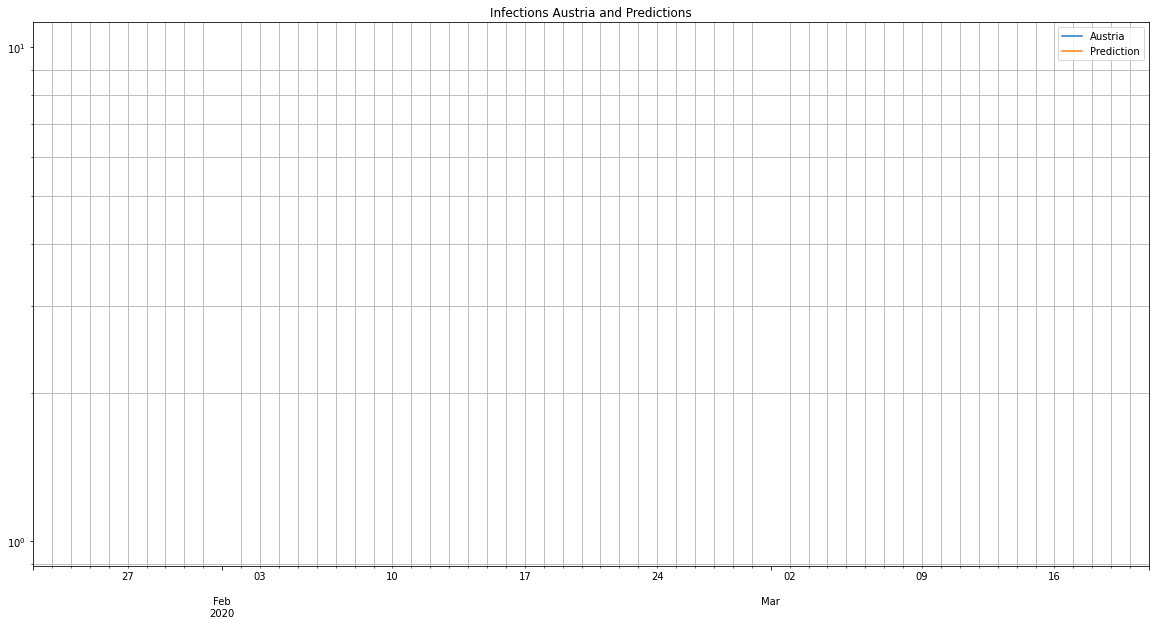

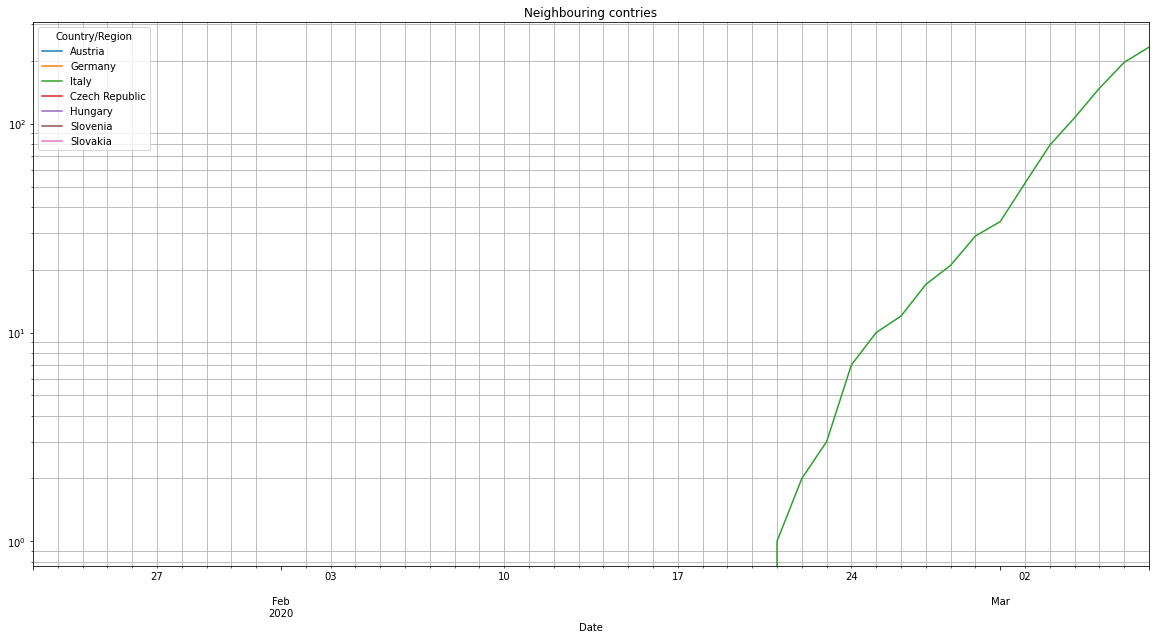

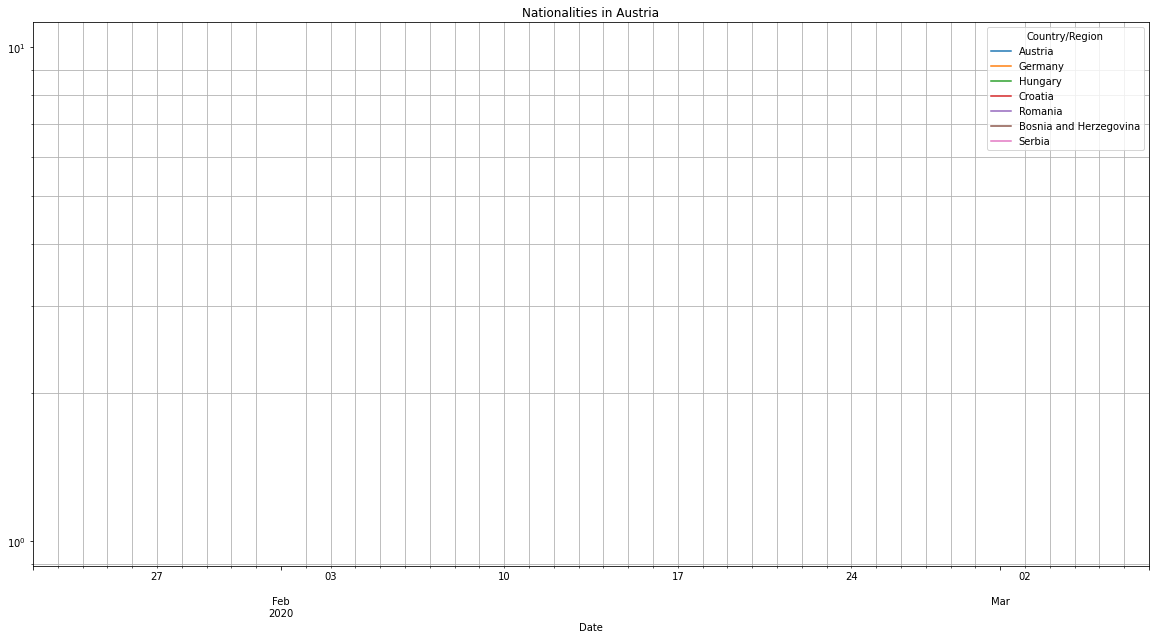

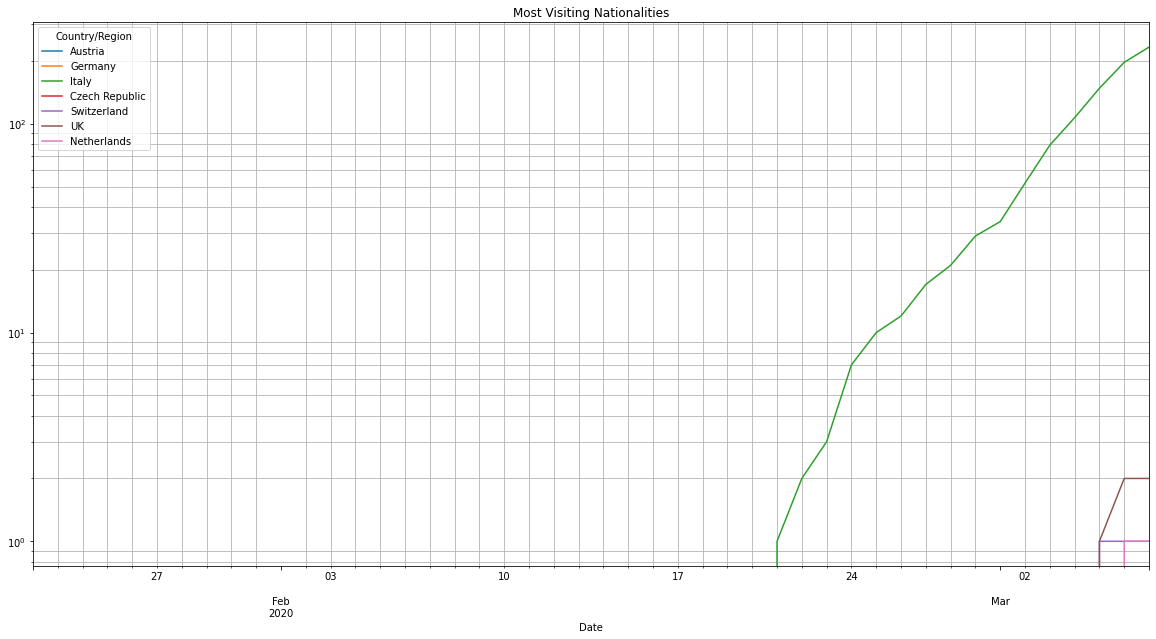

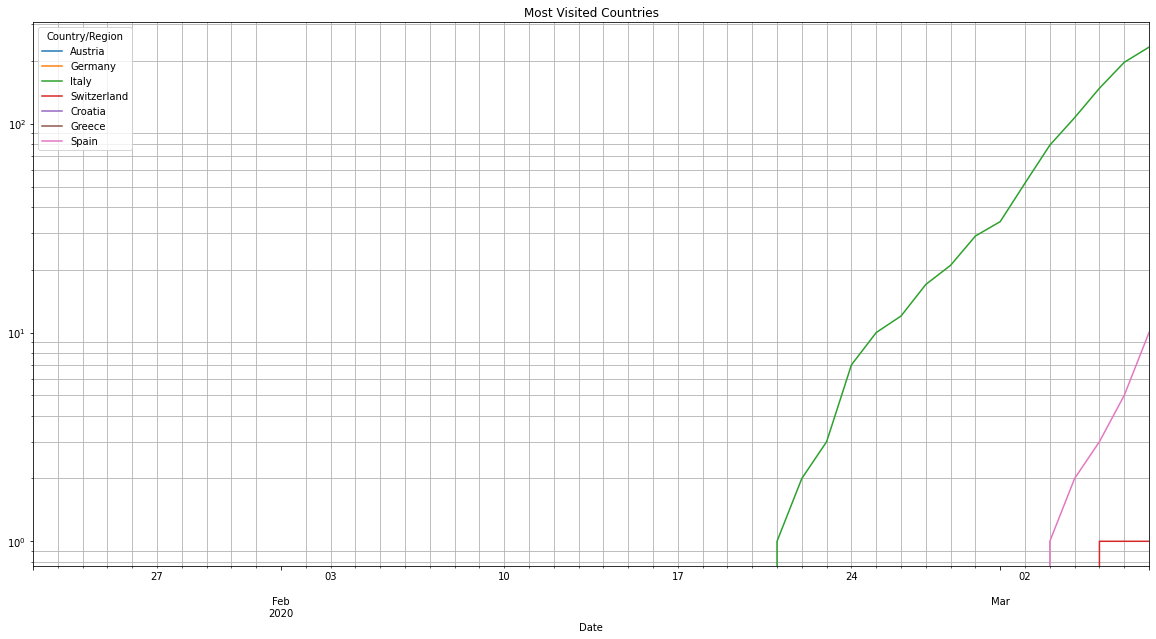

In [24]:
import matplotlib.pyplot as plt

df_confirmed_at_pred.plot(figsize=(20, 10), logy=True, title=df_confirmed_at_pred_title)
plt.grid(b=True, which='minor', linestyle='-')
plt.savefig(file_prefix+"_"+plt.gca().get_title())

df_confirmed_at_neighbours.plot(figsize=(20, 10), logy=True, title=df_confirmed_at_neighbours_title)
plt.grid(b=True, which='minor', linestyle='-')
plt.savefig(file_prefix+"_"+df_confirmed_at_neighbours_title)

df_confirmed_at_nationalities.plot(figsize=(20, 10), logy=True, title=df_confirmed_at_nationalities_title)
plt.grid(b=True, which='minor', linestyle='-')
plt.savefig(file_prefix+"_"+df_confirmed_at_nationalities_title)

df_confirmed_at_travel_incomming.plot(figsize=(20, 10), logy=True, title=df_confirmed_at_travel_incomming_title)
plt.grid(b=True, which='minor', linestyle='-')
plt.savefig(file_prefix+"_"+df_confirmed_at_travel_incomming_title)

df_confirmed_at_travel_outgoing.plot(figsize=(20, 10), logy=True, title=df_confirmed_at_travel_outgoing_title)
plt.grid(b=True, which='minor', linestyle='-')
plt.savefig(file_prefix+"_"+df_confirmed_at_travel_outgoing_title)